In [1]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(784,)))

model.add(layers.Dense(10, activation="softmax"))


Using TensorFlow backend.


In [2]:
input_tensor = layers.Input(shape=(784, ))

x = layers.Dense(32, activation= "relu")(input_tensor)

output_tensor = layers.Dense(10, activation = "softmax")(x)

model = models.Model(inputs=input_tensor, outputs= output_tensor)



In [3]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss="mse",
              metrics=["accuracy"]
             )


In [4]:
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data , test_labels) = \
    imdb.load_data(num_words = 10000)


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data ])

9999

In [9]:
word_index = imdb.get_word_index()

In [10]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

In [11]:
decoded_review = ".".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]  ]
)

In [12]:
decoded_review

"?.this.film.was.just.brilliant.casting.location.scenery.story.direction.everyone's.really.suited.the.part.they.played.and.you.could.just.imagine.being.there.robert.?.is.an.amazing.actor.and.now.the.same.being.director.?.father.came.from.the.same.scottish.island.as.myself.so.i.loved.the.fact.there.was.a.real.connection.with.this.film.the.witty.remarks.throughout.the.film.were.great.it.was.just.brilliant.so.much.that.i.bought.the.film.as.soon.as.it.was.released.for.?.and.would.recommend.it.to.everyone.to.watch.and.the.fly.fishing.was.amazing.really.cried.at.the.end.it.was.so.sad.and.you.know.what.they.say.if.you.cry.at.a.film.it.must.have.been.good.and.this.definitely.was.also.?.to.the.two.little.boy's.that.played.the.?.of.norman.and.paul.they.were.just.brilliant.children.are.often.left.out.of.the.?.list.i.think.because.the.stars.that.play.them.all.grown.up.are.such.a.big.profile.for.the.whole.film.but.these.children.are.amazing.and.should.be.praised.for.what.they.have.done.don't.you.th

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    
    for i , sequences in enumerate(sequences):
        results[i, sequences] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
    

In [14]:
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"]
             )

from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = "binary_crossentropy",
              metrics=["accuracy"])
             

In [16]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
              metrisc=[metrics.binary_accuracy]
             )


In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000: ]

y_val = y_train[:10000]
partial_y_train = y_train[10000: ]


In [18]:
partial_x_train.shape

(15000, 10000)

In [19]:
partial_y_train.shape

(15000,)

In [20]:
y_val.shape

(10000,)

In [21]:


model.compile(optimizer="rmsprop",
             loss = "binary_crossentropy",
            metrics =["acc"]
             )

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512, validation_data=(x_val, y_val))
#                    batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.5257 - acc: 0.7812 - val_loss: 0.3916 - val_acc: 0.8728
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.3174 - acc: 0.8998 - val_loss: 0.3129 - val_acc: 0.8849
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2305 - acc: 0.9279 - val_loss: 0.2807 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1821 - acc: 0.9413 - val_loss: 0.2878 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1475 - acc: 0.9536 - val_loss: 0.2778 - val_acc: 0.8907
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1237 - acc: 0.9620 - val_loss: 0.2874 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0994 - acc: 0.9709 - val_loss: 0.3603 - v

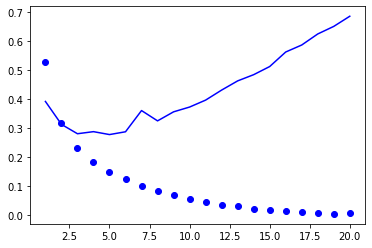

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label=" Training loss")

plt.plot(epochs, val_loss_values, "b", label= "Validation loss")





In [23]:
model = models.Sequential()

model.add(layers.Dense(16, activation= "relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation= "relu"))
model.add(layers.Dense(1, activation= "sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.4782 - accuracy: 0.8229
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2772 - accuracy: 0.9089
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2096 - accuracy: 0.9266
Epoch 4/4
25000/25000 [==============================] - 4s 157us/step


In [24]:
results

[0.2860119505119324, 0.8849599957466125]

In [25]:
model.predict(x_test)

array([[0.24387598],
       [0.9984127 ],
       [0.8595526 ],
       ...,
       [0.1204411 ],
       [0.09174982],
       [0.6771871 ]], dtype=float32)

# キャパシティが小さいモデル

In [26]:
model2 = models.Sequential()

model2.add(layers.Dense(4, activation= "relu", input_shape=(10000,)))
model2.add(layers.Dense(4, activation= "relu"))
model2.add(layers.Dense(1, activation= "sigmoid"))

model2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model2.fit(x_train, y_train, epochs=4, batch_size=512)

results2 = model2.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.5918 - accuracy: 0.6384
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.4940 - accuracy: 0.8398
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4475 - accuracy: 0.8885
Epoch 4/4
25000/25000 [==============================] - 4s 142us/step


In [27]:
results2

[0.4579889340305328, 0.8746399879455566]

In [28]:
model2.predict(x_test)

array([[0.44707292],
       [0.99904984],
       [0.9611868 ],
       ...,
       [0.44707292],
       [0.44707292],
       [0.66227615]], dtype=float32)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.6482 - accuracy: 0.6115 - val_loss: 0.6130 - val_accuracy: 0.5989
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.5756 - accuracy: 0.7424 - val_loss: 0.5585 - val_accuracy: 0.7370
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.5248 - accuracy: 0.8163 - val_loss: 0.5233 - val_accuracy: 0.7865
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.4854 - accuracy: 0.8557 - val_loss: 0.5009 - val_accuracy: 0.8010
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.4539 - accuracy: 0.8801 - val_loss: 0.4763 - val_accuracy: 0.8653
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.4277 - accuracy: 0.9045 - val_loss: 0.4630 - val_accuracy: 0.8636
Epoch 7/20
15000/15000 [==============================] - 2s 1

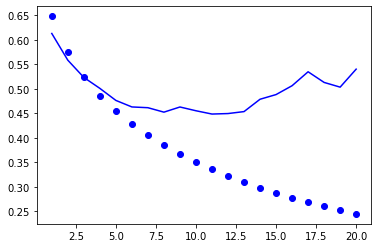

In [29]:
plt.clf()

model22 = models.Sequential()
model22.add(layers.Dense(4, activation= "relu", input_shape=(10000,)))
model22.add(layers.Dense(4, activation= "relu"))
model22.add(layers.Dense(1, activation= "sigmoid"))
model22.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history22 = model22.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512, validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

history_dict22 = history22.history
loss_values22 = history_dict22["loss"]
val_loss_values22 = history_dict22["val_loss"]

epochs22 = range(1, len(loss_values22) + 1)

plt.plot(epochs22, loss_values22, "bo", label=" Training loss")
plt.plot(epochs22, val_loss_values22, "b", label= "Validation loss")

# キャパシティが大きいモデル


In [30]:
# model3 = models.Sequential()

# model3.add(layers.Dense(512, activation= "relu", input_shape=(10000,)))
# model3.add(layers.Dense(512, activation= "relu"))
# model3.add(layers.Dense(1, activation= "sigmoid"))

# model3.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# model3.fit(x_train, y_train, epochs=4, batch_size=512)

# results3 = model3.evaluate(x_test, y_test)

In [31]:
# results3

In [32]:
# model3.predict(x_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.5151 - accuracy: 0.7669 - val_loss: 0.3725 - val_accuracy: 0.8339
Epoch 2/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2455 - accuracy: 0.9021 - val_loss: 0.3628 - val_accuracy: 0.8485
Epoch 3/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1525 - accuracy: 0.9419 - val_loss: 0.2784 - val_accuracy: 0.8890
Epoch 4/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.0686 - accuracy: 0.9753 - val_loss: 0.3796 - val_accuracy: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.0668 - accuracy: 0.9787 - val_loss: 0.3645 - val_accuracy: 0.8868
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.5703 - val_accuracy: 0.8827
Epoch 7/20
15000/15000 [==============================] - 2s 1

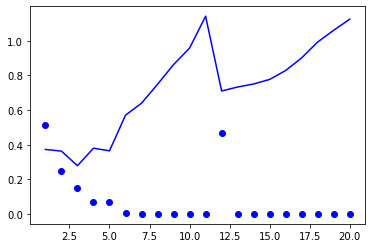

In [33]:
plt.clf()

model4 = models.Sequential()
model4.add(layers.Dense(512, activation= "relu", input_shape=(10000,)))
model4.add(layers.Dense(512, activation= "relu"))
model4.add(layers.Dense(1, activation= "sigmoid"))
model4.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512, validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

history_dict4 = history4.history
loss_values4 = history_dict4["loss"]
val_loss_values4 = history_dict4["val_loss"]

epochs4 = range(1, len(loss_values4) + 1)

plt.plot(epochs4, loss_values4, "bo", label=" Training loss")
plt.plot(epochs4, val_loss_values4, "b", label= "Validation loss")